https://www.kaggle.com/c/aptos2019-blindness-detection/discussion/107987


# start

In [1]:
PRFX = 'MelEDA0703B1'
PRFX_PREP = 'MelPrp0630C1'

# setup

In [2]:
import albumentations as A
from albumentations import pytorch as AT


from pathlib import Path
import pickle
import pandas as pd
import random
import os
import numpy as np
import matplotlib.pyplot as plt

from torch.utils.data import Dataset, DataLoader

from torchvision import transforms
from PIL import Image
import cv2


def augment_and_show(aug, img):
    img = aug(image=img)['image']
    plt.imshow(img)
    plt.show()

def get_img(fnm):
    img = cv2.imread(fnm)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    return img

In [3]:
p_cmp = '../input/siim-isic-melanoma-classification/'
p_prp = f'../output/{PRFX_PREP}'
dftrn = pd.read_csv(f'{p_prp}/train_all.csv') 
dftst = pd.read_csv(f'{p_prp}/test.csv')

../output/MelPrp0630C1/siim-isic-melanoma-classification/jpeg/train/ISIC_3689832.jpg


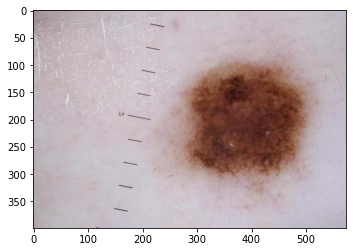

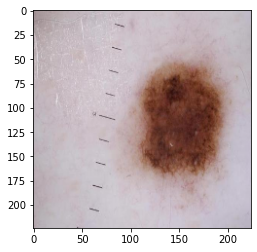

In [4]:
fnm = np.random.choice(dftrn.im_pth)
print(fnm)
x = Image.open(fnm)
plt.imshow(x);
plt.show()
x.size

x = get_img(fnm)
x = A.Resize(224, 224)(image=x)['image']
plt.imshow(x);

In [5]:
y = AT.ToTensor()(image=x)['image']
y.shape

torch.Size([3, 224, 224])

In [6]:
# Diheral TTA outside dataloader
def get_trans(img, I):
    if I >= 4:
        img = img.transpose(2,3)
    if I % 4 == 0:
        return img
    elif I % 4 == 1:
        return img.flip(2)
    elif I % 4 == 2:
        return img.flip(3)
    elif I % 4 == 3:
        return img.flip(2).flip(3)

In [7]:
ybatch = y[None]
ybatch.shape

torch.Size([1, 3, 224, 224])

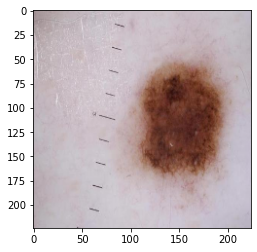

In [8]:
plt.imshow(x);

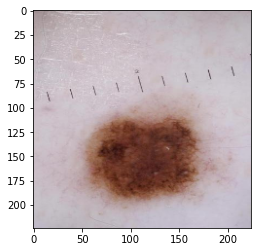

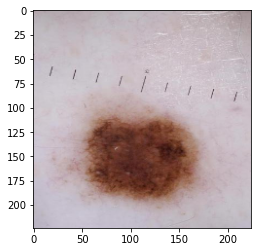

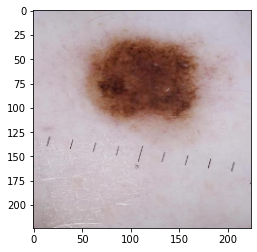

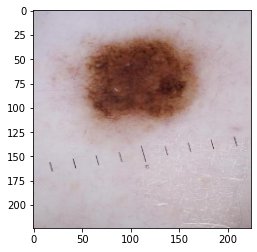

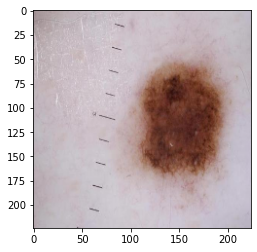

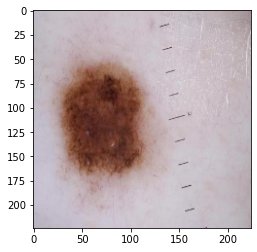

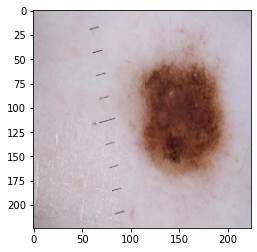

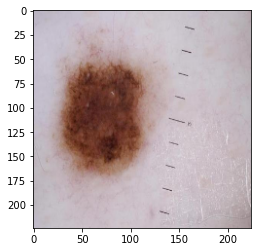

In [9]:
for I in range(8):
    zbatch = get_trans(ybatch, I)
    plt.imshow(zbatch[0].transpose(0,2))
    plt.show()